# Constained least squares problem

The constrained least squares problem(CLS) is

\begin{align}
    \text{minimize} \quad ||Ax-b||^2 \\
    \text{subject to} \quad Cx = d
\end{align}

In [8]:
function cls_solve_kkt(A, b, C, d)
    m, n = size(A)
    p, n = size(C)
    G = A'*A 
    KKT = [2*G C';
           C   zeros(p, p)]
    rhs = [2*A'*b; d]
    xzhat = KKT \ rhs 
    xhat = xzhat[1:n, :]
    return xhat 
end;

4.965068306494546e-16

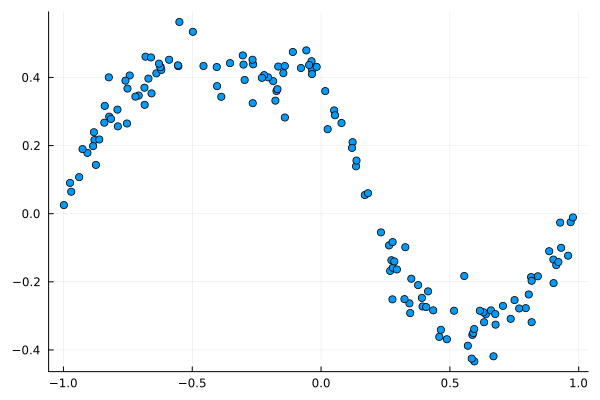

In [9]:
# Use cls_solve_kkt function to fit a Piecewise polynomial 
# 
# fhat(x) = p(x) = theta1 + theta2x + theta3x^2 + theta4x^3 for x <= a
# fhat(x) = q(x) = theta5 + theta6x + theta7x^2 + theta8x^3 for x  > a
# subject to 
    # p(a)  = q(a)
    # dp(a) = dq(a)
    # i.e. the two polynomials have matching value and slope at the point a 
#
# We have data points x1, . . ., xM <= a and xM+1, . . . , XN > a
# and corresponding values y1, . . ., yN 
# we take a = 0, polynomials p and q of degree 3, and N = 2M = 140

M = 70
N = 2*M

xleft = rand(M) .- 1
xright = rand(M)
x = [xleft; xright]
y = x.^3 - x + 0.4 ./ (1 .+ 25*x.^2) + 0.05*randn(N)

using Plots 
scatter(x, y, legend=false)

We impose the continuity constraints
\begin{align}
p(a) = q(a) \\
p'(a) = q'(a) \\
<=> \\
p(a) - q(a) = 0 \\
p'(a) - q'(a) = 0 \\
<=> \\
\theta_1+\theta_2a+\theta_3a^2+\theta_4a^3-\theta_5-\theta_6a-\theta_7a^2-\theta_8a^3 = 0\\
\theta_2+2\theta_3a+3\theta_4a^2-\theta_6-2\theta_7a-3\theta_8a^2 = 0
\end{align}

We can determine the coefficients $ \Theta = (\theta_1, . . ., \theta_8) $

that minimize the sum of squares of the prediction errors, subejct to the continuity constraints,

by solving a constrained least squares problem

\begin{align}
\text{minimize} \quad || A\Theta - b ||^2 \\
\text{subject to} \quad C \Theta = d \\
\end{align}
$
A = 
\begin{bmatrix}
    \text{vandermonde(x,n)} & 0 \\
    0 & \text{vandermonde(x,n)} \\
\end{bmatrix}
\\
b = y
\\
C = 
\begin{bmatrix}
1 & a & a^2 & a^3  & -1 & -a & -a^2 & -a^3 \\ 
0 & 1 & 2a  & 3a^2 & 0  & -1 & -2a  & -3a^2 
\end{bmatrix}
\\
d =
\begin{bmatrix}
0 \\
0
\end{bmatrix} 
$


In [21]:
n = 4 
A11 = vandermonde(xleft, n)
A12 = zeros(M, n)
A21 = zeros(M, n)
A22 = vandermonde(xright, n)
A = [A11 A12; 
     A21 A22]
b = y; 
a = 0.0
C = [vandermonde(a, n) -vandermonde(a, n);
     0 1 2*a 3*a^2 0 -1 -2*a -3*a^2]
d = [0.0; 0.0]
Thetas = cls_solve_kkt(A, b, C, d);

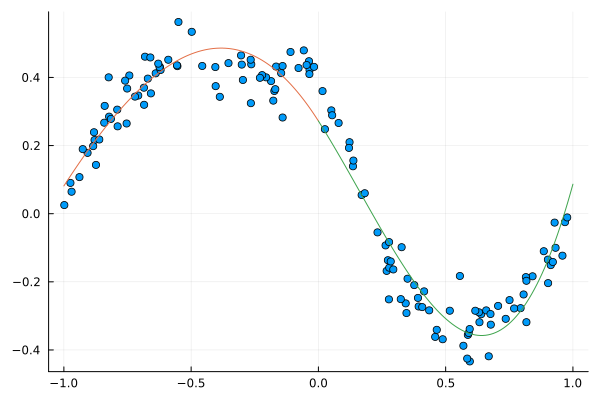

In [28]:
using Plots 
xi_series = linspace(-1, a, 100) # x[i] is 100 numbers less than a 
yihat = vandermonde(xi_series, 4) * Thetas[1:4] 
xj_series = linspace(a, 1, 100)
yjhat = vandermonde(xj_series, 4) * Thetas[5:8]
scatter(x, y, legend=false)
plot!(xi_series, yihat)
plot!(xj_series, yjhat)

In [34]:
function cls_solve_kkt(A, b, C, d)
    m, n = size(A)
    p, n = size(C)
    G = A'*A 
    KKT = [2*G C';
           C zeros(p, p)]
    rhs = [2*A'*b; d]
    xzhat = KKT \ rhs 
    xhat = xzhat[1:n]
    return xhat
end
A = randn(120, 8)
b = randn(120)
C = randn(2, 8)
d = randn(2)
x = cls_solve_kkt(A, b, C, d)
norm(C*x-d)

4.577566798522237e-16